# P-Median with PULP

<from https://soumenatta.medium.com/solving-the-p-median-problem-using-pulp-in-python-31d9bc13cc2d>

The **p-median problem** is a well-known facility location problem that seeks to determine the optimal locations for a fixed number of facilities to serve a set of customers, with the goal of minimizing the total distance or cost of serving the customers.

This problem arises in many practical applications, such as logistics, transportation, and public services.

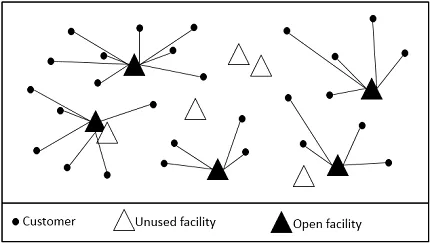

In this tutorial, we will present a Python implementation of the p-median problem using the *PuLP modeling language* and the branch-and-bound algorithm. PuLP is an open-source library for modeling and solving optimization problems in Python, and it provides a user-friendly syntax for defining decision variables, objective functions, and constraints.


We will begin by loading a sample dataset of the p-median problem from a text file and defining the problem using PuLP. We will then introduce the key components of the problem, such as the decision variables for selecting facility locations and the constraints for assigning customers to facilities.

Next, we show how to solve the problem using the branch-and-bound algorithm, which is a powerful exact method for solving mixed-integer linear programs. We will discuss some important solver parameters, such as the gap tolerance and time limit, and demonstrate how to interpret the results of the optimization.

By the end of this article, readers will have a better understanding of how to use PuLP to model and solve facility location problems, and how to apply these techniques to their own practical applications.

# **Problem Formulation**
The p-median problem can be formulated as a mixed-integer linear program (MILP) as follows:

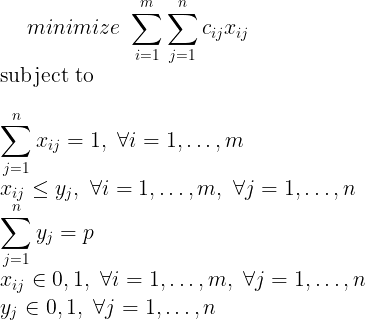

where *m* is the number of customers, n is the number of potential facility locations, p is the number of facilities to be opened, cᵢⱼ is the cost of serving customer i from facility j, xᵢⱼ is a binary decision variable indicating whether customer i is served by facility j, and yⱼ is a binary decision variable indicating whether facility j is opened.
The goal of the problem is to find p locations (facilities) among a set of n potential locations that minimize the total distance between each customer and the nearest facility. The first constraint set ensures that each customer is served by exactly one facility. The second constraint set ensures that if a customer is assigned to a facility, then the facility must be selected. The third constraint ensures that exactly p facilities are opened. The fourth and fifth constraints specify the domain of the decision variables.

# **Dataset**
In this tutorial, we will use synthetic data for the p-median problem. The data file can be downloaded from the following link (https://gist.github.com/SoumenAtta/fc4fef0053a41dc0dd7eadae53a13df0)


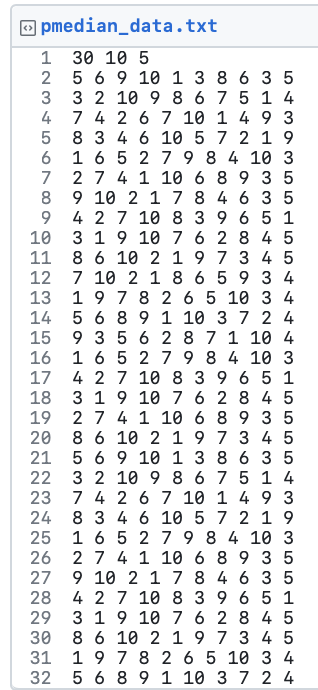![image.png]()

The input data is in a text file name ‘pmedian_data.txt’. The text file contains three integers on the first line: m, n, and p. The first integer, m, represents the number of customers. The second integer, n, represents the number of potential facility locations. The third integer, p, represents the number of facilities we are required to locate. The remaining lines of the text file represent the cost of serving each customer from each potential location.

# **Implementation using PuLP in Python**
Now, we will discuss the implementation of the above formulation of the p-median problem using PuLP in Python.


In [ ]:
!pip install pulp
from pulp import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 35.3 MB/s eta 0:00:00


**Step 1: Import the required module**

The statement from pulp import * imports all the classes and functions defined in the pulp library, allowing the user to create and solve optimization problems using the library's objects and methods. This statement is typically used at the beginning of an optimization program to make all the pulp classes and functions available throughout the code.

**Step 2: Load input data**

In [ ]:
# Load data
with open("pmedian_data.txt") as file:
    m, n, p = map(int, file.readline().split())
    c = [[int(x) for x in file.readline().split()] for i in range(m)]

The above code snippet loads the problem data from the file pmedian_data.txt and stores it in the variables m, n, p, and c.

The file pmedian_data.txt presumably contains the following data on its first line: m, n, and pwhere m, n, and p are integers. These are the number of facilities, customers, and facilities to locate, respectively.

The remaining lines of the file contain the cost of serving each customer by each facility. The c variable is a two-dimensional list that stores these costs. Each row i of the c matrix represents a facility, and each column j represents a customer. Thus, c[i][j] is the cost of serving customer j by facility i.

The with statement opens the file pmedian_data.txt in read mode and automatically closes it once the block of code inside the with statement is executed. The map function reads the first line of the file, splits it into a list of strings, and converts each element to an integer. The resulting list of integers is assigned to the variables m, n, and p. The remaining lines of the file are then read and parsed into the two-dimensional list c using a list comprehension.

**Step 3: Define the problem**

In [ ]:
# Define the problem
prob = LpProblem("p-median", LpMinimize)

In the given code, LpProblem is a function provided by the PuLP library that is used to define an optimization problem. The function takes two arguments:

    name (string): a user-defined name for the problem.
    sense (int): the optimization sense of the problem, which can be either LpMinimize or LpMaximize.

In the given code, a minimization problem is defined and named “p-median” using LpProblem. This creates an empty optimization problem that can be filled with decision variables, constraints, and an objective function.

**Step 4: Define decision variables**

In [ ]:
# Define decision variables
x = LpVariable.dicts("x", [(i,j) for i in range(m) for j in range(n)], 0, 1, LpBinary)
y = LpVariable.dicts("y", [j for j in range(n)], 0, 1, LpBinary)

In the above code snippet, the decision variables are defined using the LpVariable.dicts method from the PuLP library. The first line defines a dictionary of binary decision variables x, where each variable represents whether a customer i is assigned to a facility j (i.e., whether facility j serves customer i). The dictionary is indexed by tuples (i,j) for all combinations of i and j, and each variable is initialized with a lower bound of 0 and an upper bound of 1, indicating that it can take on binary values only.

The second line defines another dictionary of binary decision variables y, where each variable represents whether a facility j is open or closed. The dictionary is indexed by integers from 0 to n-1, which represent the n facilities in the problem. Like x, each variable is initialized with a lower bound of 0 and an upper bound of 1.

**Step 5: Define objective function**

In [ ]:
# Define objective function
prob += lpSum([c[i][j] * x[(i,j)] for i in range(m) for j in range(n)])

In [ ]:
prob

In the above line of code, we are defining the objective function of our optimization problem. The objective function is the mathematical function that we want to minimize or maximize. In the p-median problem, we want to minimize the total cost of opening facilities and serving customers.

The objective function is defined using the lpSum() function, which takes a list of terms that make up the objective function. Each term is a product of a decision variable and a coefficient. In this case, the coefficient is the cost c[i][j] of serving customer i by facility j, and the decision variable is x[(i,j)], which is binary and takes a value of 1 if facility j serves customer i, and 0 otherwise.

The lpSum() function takes care of summing up all the terms in the list and returning the total value of the objective function. Finally, we add the objective function to our problem using the += operator.

**Step 6: Define constraints**

In [ ]:
# Define constraints
for i in range(m):
    prob += lpSum([x[(i,j)] for j in range(n)]) == 1

for i in range(m):
    for j in range(n):
        prob += x[(i,j)] <= y[j]

prob += lpSum([y[j] for j in range(n)]) == 2

In [ ]:
prob

These lines of code define the constraints that the problem must satisfy.

The first constraint, for i in range(m): prob += lpSum([x[(i,j)] for j in range(n)]) == 1, ensures that each customer is assigned to exactly one facility. It is expressed by summing over all facilities j and requiring that each customer i is served by exactly one of them.

The second constraint, for i in range(m): for j in range(n): prob += x[(i,j)] <= y[j], ensures that if a facility is open, then the customers served by that facility should be assigned to it. This is expressed by saying that if x[i,j] = 1 (facility j serves customer i), then y[j] must also be 1 (facility j is open).

The third constraint, prob += lpSum([y[j] for j in range(n)]) == p, limits the number of facilities that can be open to p. It is expressed by summing over all facilities j and requiring that the total number of open facilities is exactly equal to p.

Together, these constraints ensure that the objective function is minimized subject to the conditions that each customer is served by exactly one facility, each facility can serve a limited number of customers, and the total number of open facilities is limited top.

**Step 7: Solve the problem**

In [ ]:
# Solve the problem using branch-and-bound algorithm
prob.solve(PULP_CBC_CMD(gapRel=0.0, threads=1, timeLimit=600))

1

In this line, we are instructing PuLP to solve the optimization problem using the branch-and-bound algorithm provided by the PULP_CBC_CMD solver. We pass several parameters to the solver, including:

    gapRel=0.0: This sets the relative optimality gap tolerance to 0, meaning the solver will continue searching for the optimal solution until it finds the best possible solution within the given time limit.
    threads=1: This specifies the number of threads the solver can use for parallel computing. Here, we set it to 1, meaning that the solver will run in single-threaded mode.
    
    timeLimit=600: This sets the maximum time (in seconds) that the solver can use to find the solution. Here, we set it to 600 seconds (or 10 minutes). If the solver fails to find the optimal solution within the time limit, it will return the best solution it has found so far.

Note that the solver options and parameters may differ depending on the specific solver being used.

**Step 8: Print the result**

In [ ]:
# Print results
print("Optimal objective value:", value(prob.objective))
for j in range(n):
    if y[j].value() > 0.5:
        print("Facility", j, "is located.")
        for i in range(m):
            if x[(i,j)].value() > 0.5:
                print("- Customer", i, "is served.")

Optimal objective value: 81.0
Facility 3 is located.
- Customer 2 is served.
- Customer 4 is served.
- Customer 5 is served.
- Customer 6 is served.
- Customer 9 is served.
- Customer 10 is served.
- Customer 13 is served.
- Customer 14 is served.
- Customer 17 is served.
- Customer 18 is served.
- Customer 21 is served.
- Customer 23 is served.
- Customer 24 is served.
- Customer 25 is served.
- Customer 28 is served.
Facility 8 is located.
- Customer 0 is served.
- Customer 1 is served.
- Customer 3 is served.
- Customer 7 is served.
- Customer 8 is served.
- Customer 11 is served.
- Customer 12 is served.
- Customer 15 is served.
- Customer 16 is served.
- Customer 19 is served.
- Customer 20 is served.
- Customer 22 is served.
- Customer 26 is served.
- Customer 27 is served.
- Customer 29 is served.


After the problem is solved, this code block prints the results of the optimization.

The first line prints the optimal objective value, which is the minimum cost of opening p facilities and serving all the customers. The value() method is used to retrieve the optimal objective value from the LpProblem object prob.

Then, for each facility, the code checks if it was opened or not. If the value of the binary variable y[j] is greater than 0.5, it means that the j-th facility was opened. For this facility, the code prints its index and the list of customers that are served by it. To do so, the code checks the value of the binary variable x[(i,j)] for all customers i. If the value is greater than 0.5, it means that the customer i is served by the j-th facility.

Overall, this code block provides a way to interpret the results of the optimization problem and to understand which facilities are opened and which customers are served by them.

The output is shown below:

# **Conclusion**

In this tutorial, we learned how to solve the p-median problem using Python and the PuLP library. The p-median problem is a classic optimization problem that involves finding the optimal location of p facilities to minimize the sum of distances between customers and facilities.

We first loaded the data from a text file and defined the problem, decision variables, objective function, and constraints using PuLP. We then used the branch-and-bound algorithm to solve the problem and obtain the optimal objective value. Finally, we printed the results, which included the optimal objective value and the locations of the facilities and customers.

This tutorial provides a useful example of how to apply optimization techniques to solve real-world problems using Python and PuLP. The concepts and techniques learned in this tutorial can be applied to other optimization problems in various fields, including operations research, engineering, and economics.